# Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Problem Statement
In this data, we have one indepenedent variable 'Temperature' and one depenedent variable 'Revenue'. You have to build a Decision Tree Regressor to study the relationship b/w the two variables of the ICE CREAM shop and then predict the revenue for the ICE CREAM shop based on the temperature on a particular day.

# Importing the Dataset

link :  https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ml Decision Tree Regressor/Temperature,Revenue.csv')

In [ ]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [ ]:
df.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [ ]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [ ]:
df.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

Text(0.5, 1.0, 'Temperature Vs Revenue')

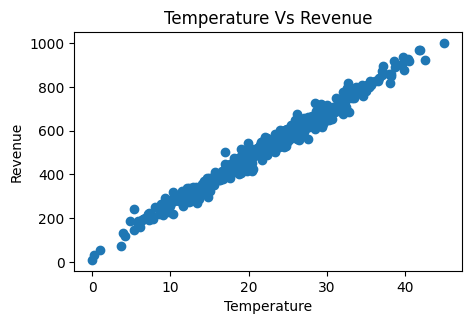

In [ ]:
plt.rcParams['figure.figsize'] = [5,3.10]
plt.scatter(df.Temperature, df.Revenue)
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.title('Temperature Vs Revenue')

In [ ]:
df.corr()

,Temperature,Revenue
Temperature,1.000000,0.989802
Revenue,0.989802,1.000000


<Axes: >

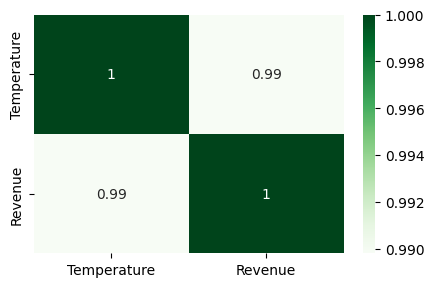

In [ ]:
sns.heatmap(df.corr(),cmap= 'Greens', annot = True)

<Axes: >

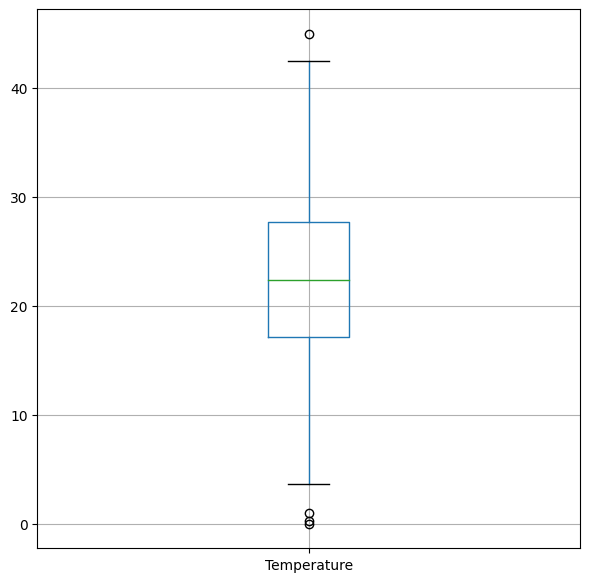

In [ ]:
plt.figure(figsize = (7,7))
df[['Temperature']].boxplot()

here the range of temperature is b/n 0 to 45
and we can say that the upper bound is around 42
and lower bound nearer to 3 or 4
so minimum.
according to boxplot the outlier is nearer to 45 so there is not much diff. b/n u.bound and outlier value
same in case of lower bound and the outlier and the minimum value is 0 so we cannot consider those values as outliers.

<Axes: >

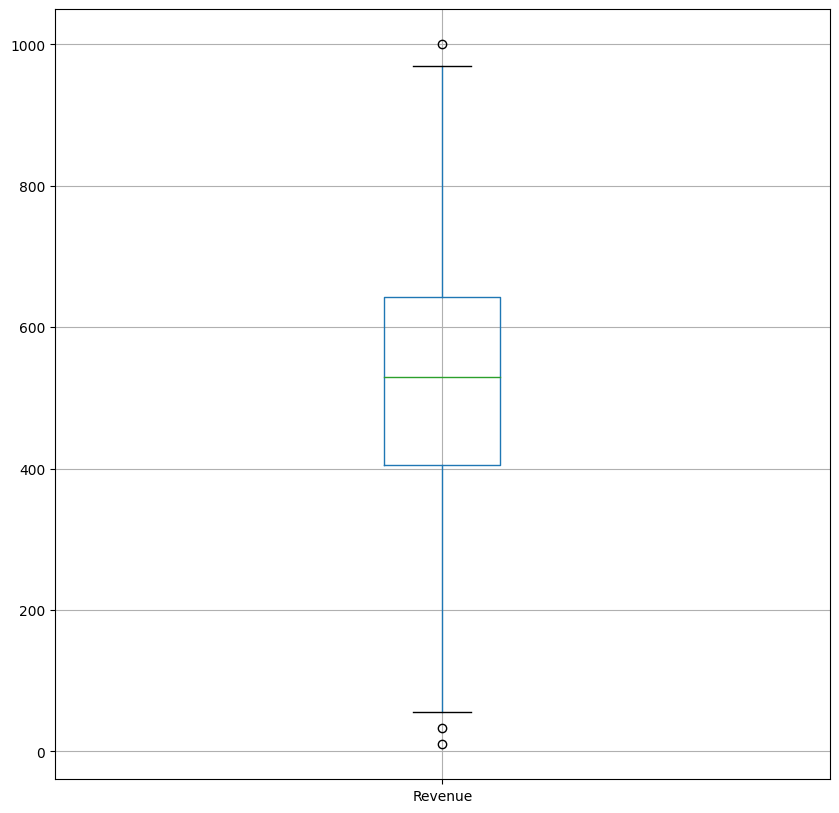

In [ ]:
plt.figure(figsize = (10,10))
df[['Revenue']].boxplot()

here the range of revenue is b/n 10 to 1000 and we can say that the upper bound is around 980 and lower bound nearer to 40 or 50 . according to boxplot the outlier is nearer to 1000 so there is not much diff. b/n u.bound and outlier value same in case of lower bound and the outlier and the minimum value is 10 so we cannot consider those values as outliers.

# Splitting the Dataset

In [ ]:
X = df[['Temperature']]  # feature
y = df.Revenue  # target variable


When you are working with single feature it should be always in 2D form not in 1D form to train the model.

In [ ]:
X.ndim

2

In [ ]:
y.ndim

1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
len(X_train)

400

In [ ]:
len(X_test)

100

# Model Selection

In [ ]:
model1 = DecisionTreeRegressor()
model2 = LinearRegression()

# Training the Model

In [ ]:
model1.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
model2.fit(X_train,y_train)

LinearRegression()

# Testing the Model

In [ ]:
linear_y_predicted = model2.predict(X_test)

In [ ]:
decision_y_predicted = model1.predict(X_test)

In [ ]:
linear_y_predicted

array([681.93870622, 632.14474995, 559.64360486, 498.90609993,
       615.45939165, 304.72417213, 285.79420948, 315.60842003,
       506.26427154, 685.69744019, 723.96030494, 400.84625166,
       431.61634142, 671.36600031,  52.51422053, 198.77682819,
       523.08595488, 563.90495549, 583.83579144, 682.24517768,
       556.2285085 , 783.88766163, 655.44109362, 570.0735459 ,
       912.21841974, 664.74778505, 315.96428407, 631.00983241,
       731.1169322 , 698.02984963, 435.08453949, 471.22058847,
       710.29440571, 799.81874771, 641.02153776, 493.66044553,
       744.9247237 , 318.10831232, 262.69083171, 132.04437543,
       582.55738268, 230.41054193, 547.29799783, 393.00654153,
       436.66704225, 593.02780835, 572.09312165, 125.16251036,
       474.79444877, 530.45025905, 623.19251713, 503.4813544 ,
       484.60103791, 498.58705266, 551.22738648, 630.80646076,
       573.12703075, 679.486141  , 171.29759926, 660.49458416,
       583.75017395, 704.57274239, 535.82240023, 630.12

In [ ]:
decision_y_predicted

array([702.9940111, 649.729072 , 603.2329422, 521.7754452, 612.2437215,
       278.4182651, 293.9263927, 303.7343815, 528.1162401, 696.6401775,
       733.215828 , 414.423028 , 413.9140669, 679.3177906,  10.       ,
       216.183462 , 550.2785159, 569.6187562, 563.2509867, 702.9940111,
       523.1245467, 756.9625616, 726.2337713, 526.5470649, 926.0671533,
       662.5589903, 303.7343815, 642.3498137, 773.9247547, 690.7892959,
       473.5681122, 496.0112948, 702.6236136, 809.6720534, 651.5043041,
       499.4583433, 793.079011 , 339.1095829, 276.3733742, 118.8121496,
       550.7014036, 241.2785475, 553.1196514, 395.2737497, 473.5681122,
       579.3073878, 531.7424848, 118.8121496, 541.2936627, 546.6938576,
       581.0740052, 520.4703098, 451.4507843, 521.7754452, 570.9909316,
       642.3498137, 603.3053386, 629.8937918, 170.2377561, 631.3182368,
       550.7014036, 696.7166402, 516.5486011, 642.3498137, 618.2357655,
       441.5087331, 545.9039291, 499.4583433, 773.9247547, 274.0

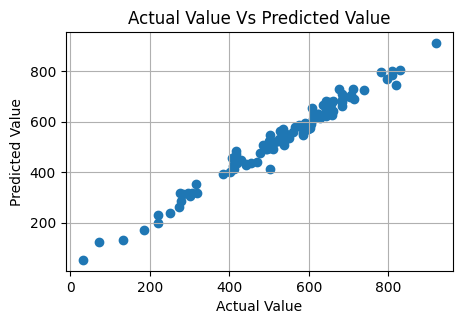

In [ ]:
# Actual Value V/s Predicted value for Linear regression
plt.scatter(y_test,linear_y_predicted )
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual Value Vs Predicted Value')
plt.grid()

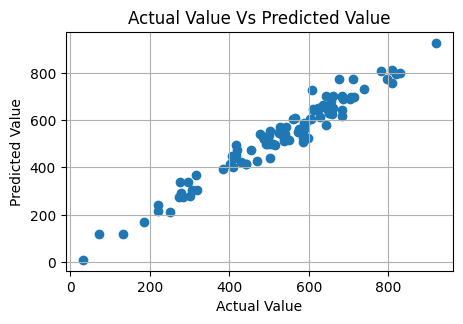

In [ ]:
# Actual Value V/s Predicted value for Decision Tree
plt.scatter(y_test,decision_y_predicted )
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual Value Vs Predicted Value')
plt.grid()

In [ ]:
newdf_linear = pd.DataFrame({'Actual Value': y_test,
                             'Predicted Value': linear_y_predicted })

In [ ]:
newdf_decision = pd.DataFrame({'Actual Value': y_test,
                             'Predicted Value': decision_y_predicted})

In [ ]:
newdf_linear.head()

,Actual Value,Predicted Value
361,659.873287,681.938706
73,623.248701,632.144750
374,559.135869,559.643605
155,497.752318,498.906100
104,627.901841,615.459392


In [ ]:
newdf_decision.head()

,Actual Value,Predicted Value
361,659.873287,702.994011
73,623.248701,649.729072
374,559.135869,603.232942
155,497.752318,521.775445
104,627.901841,612.243721


<Axes: >

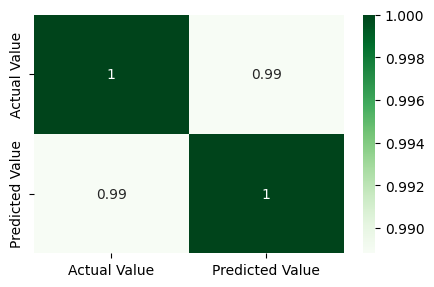

In [ ]:
sns.heatmap(newdf_linear.corr(), annot = True, cmap = 'Greens')

<Axes: >

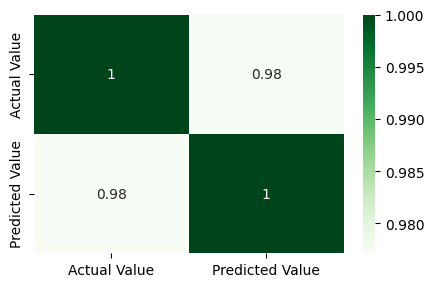

In [ ]:
sns.heatmap(newdf_decision.corr(), annot = True, cmap = 'Greens')

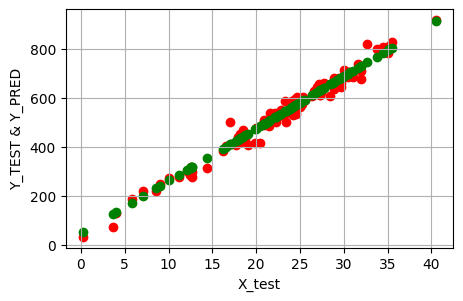

In [ ]:
plt.scatter(X_test, y_test, c='r')
plt.scatter(X_test, linear_y_predicted, c='green')
plt.xlabel('X_test')
plt.ylabel('Y_TEST & Y_PRED')
plt.grid()

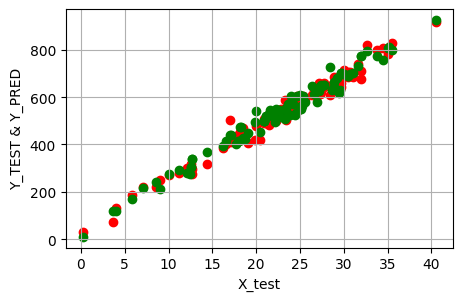

In [ ]:
plt.scatter(X_test, y_test, c='r')
plt.scatter(X_test, decision_y_predicted, c='green')
plt.xlabel('X_test')
plt.ylabel('Y_TEST & Y_PRED')
plt.grid()

# Checking the Performance

In [ ]:
f'Linear Regression Accuracy : {r2_score(y_test, linear_y_predicted)}'

'Linear Regression Accuracy : 0.9771532792713993'

In [ ]:
f'Decision Tree Regressor : {r2_score(y_test, decision_y_predicted)}'

'Decision Tree Regressor : 0.9534772958686918'

In [ ]:
model1.predict([[34]])[0]

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


771.7895369

In [ ]:
model1.predict([[34.2]])[0]

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


771.7895369

In [ ]:
model2.predict([[34]])[0]

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


773.7917523574554

In [ ]:
model2.predict([[34.2]])[0]

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


778.0681471285145